<a href="https://colab.research.google.com/github/szeyu/Intro-To-DS-Group-Assignment/blob/main/WIA1007_GroupAssignment_Group_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group Member**

1.   Sim Sze Yu 23005023
2.   Khor Rui Zhe 23004890
3.   Ooi Rui Zhe 23004947
4.   Low Jia Xin 23005026
5.   Wong Yong Yee S2118482
6.   Tan Jia Le 23063840

# Special Thanks

We would like to extend our sincere gratitude to individuals who have been instrumental in the successful completion of this project. Your unwavering support and expertise played a crucial role in shaping the outcomes of this work.

##***Dr. Muhammad Shahreeza Safiruz Bin Kassim and Dr. Siti Soraya Binti Abdul Rahman***

We express our deepest appreciation to Dr. Muhammad Shahreeza Safiruz Bin Kassim and Dr. Siti Soraya Binti Abdul Rahman , our esteemed lecturers of the Introduction to Data Science. Their invaluable knowledge and willingness to share their expertise significantly enhanced our understanding towards this project. The guidance and mentorship they provided also greatly help us throughout the development process of this project.

# Design your project
As a group, you should first brainstorm and come up with a specific theme that you are interested in
exploring. This could be anything from predicting the
weather (Renewable Energy related) to predicting when a machine will fail (Predictive Maintenance).

## **Theme**
### Machine Learning on Credit Card Fraud Detection

# Data Collection
Once you have decided on a theme, you will need to collect/find data that is relevantto your project. You can use publicly available datasets or collect data on your own. Ensure that your data is relevant, reliable, and sufficient for your project.


## **Dataset**
[https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud)

## Import Data

In [ ]:
!git clone https://github.com/szeyu/Intro-To-DS-Group-Assignment.git

fatal: destination path 'Intro-To-DS-Group-Assignment' already exists and is not an empty directory.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Intro-To-DS-Group-Assignment/card_transdata.csv')

# Data Preprocessing
After collecting your data, you will need to preprocess it to make it suitable for machine learning. This may include cleaning, normalization, feature extraction and transformation.


## Initial Data Exploration

* Display the first 5 rows of the dataset to get an initial sense of the data. Use info() and describe() functions to gather basic information about the dataset, such as data types, missing values, and
summary statistics (e.g., min, max, mean, std deviation, and quartiles).

In [ ]:
#show the first 5 rows of the dataset
df.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
#display the dataframe info like data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              999961 non-null  float64
 1   distance_from_last_transaction  999971 non-null  float64
 2   ratio_to_median_purchase_price  999936 non-null  float64
 3   repeat_retailer                 999993 non-null  float64
 4   used_chip                       999989 non-null  float64
 5   used_pin_number                 999983 non-null  float64
 6   online_order                    999993 non-null  float64
 7   fraud                           999987 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


* From df.info(), the dataset has has 1000000 samples, or row of observation of 8 columns. The number of samples is quite enough. All the columns in the dataset consists of 'float64' datatype and there are some missing values in every column.


In [ ]:
# Generate descriptive statistics for the DataFrame (e.g., min, max, mean, std deviation, and quartiles).
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
distance_from_home,999961.0,26.629060,65.391395,0.004874,3.878057,9.967777,25.744561,10632.723670
distance_from_last_transaction,999971.0,5.036681,25.843484,0.000118,0.296674,0.998674,3.355862,11851.104560
ratio_to_median_purchase_price,999936.0,1.824166,2.799603,0.004399,0.475673,0.997711,2.096357,267.802942
repeat_retailer,999993.0,0.881534,0.323159,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,999989.0,0.350398,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,999983.0,0.100610,0.300811,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,999993.0,0.650547,0.476798,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,999987.0,0.087402,0.282424,0.000000,0.000000,0.000000,0.000000,1.000000


## Data Cleaning

### Clean Incomplete Data

Table Formatting

* Rename all the columns in the DataFrame to enhance clarity and consistency.

In [ ]:
# Rename all the columns in the dataset
df.rename(columns = {'distance_from_home':'Distance from Home'}, inplace = True)
df.rename(columns = {'distance_from_last_transaction':'Distance from Last Transaction'}, inplace = True)
df.rename(columns = {'ratio_to_median_purchase_price':'Ratio to Median Purchase Price'}, inplace = True)
df.rename(columns = {'repeat_retailer':'Repeat Retailer'}, inplace = True)
df.rename(columns = {'used_chip':'Used Chips'}, inplace = True)
df.rename(columns = {'used_pin_number':'Used Pin Number'}, inplace = True)
df.rename(columns = {'online_order':'Online Order'}, inplace = True)
df.rename(columns = {'fraud':'Fraud'}, inplace = True)

#Show the first 5 rows of the dataset
df.head()

,Distance from Home,Distance from Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chips,Used Pin Number,Online Order,Fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Dealing with Duplicated Values

* Find the total sum of the duplicated rows in the dataset

In [ ]:
# Check for duplicate rows in the DataFrame and count the total number of duplicates
df.duplicated().sum()

12

From the output above, we can find out that there is a total of 12 duplicate rows in the dataset.

In [ ]:
# Drop the 12 duplicate rows
df = df.drop_duplicates()

# Check the duplicate rows after dropping
df.duplicated().sum()

0

The duplicated rows have been successfully dropped.

Dealing with Missing Values and Null Values

* Identify the total number of missing values using df.isna().sum()

In [ ]:
#List down the total number of missing values in each columns
print('--Columns and the number of missing values--')
df.isna().sum()

--Columns and the number of missing values--


Distance from Home                39
Distance from Last Transaction    29
Ratio to Median Purchase Price    64
Repeat Retailer                    7
Used Chips                        11
Used Pin Number                   17
Online Order                       7
Fraud                             13
dtype: int64

In [ ]:
# Drop rows with at least 3 null values from the DataFrame
df_dropna = df.dropna(thresh = 3)

# Check the number of null values in each column
df.isna().sum()

Distance from Home                39
Distance from Last Transaction    29
Ratio to Median Purchase Price    64
Repeat Retailer                    7
Used Chips                        11
Used Pin Number                   17
Online Order                       7
Fraud                             13
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

#filling missing values with the most frequent value
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:, :] = most_frequent_imputer.fit_transform(df)

#Check the total number of null values in each column after replacing all null values with most frequent value
df.isna().sum()

Distance from Home                0
Distance from Last Transaction    0
Ratio to Median Purchase Price    0
Repeat Retailer                   0
Used Chips                        0
Used Pin Number                   0
Online Order                      0
Fraud                             0
dtype: int64

* Based on the output of df.isna().sum(), it can be observed that there are no remaining null values in the dataset after replacing all null values with the most frequent value.

In [ ]:
#display DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999988 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Distance from Home              999988 non-null  float64
 1   Distance from Last Transaction  999988 non-null  float64
 2   Ratio to Median Purchase Price  999988 non-null  float64
 3   Repeat Retailer                 999988 non-null  float64
 4   Used Chips                      999988 non-null  float64
 5   Used Pin Number                 999988 non-null  float64
 6   Online Order                    999988 non-null  float64
 7   Fraud                           999988 non-null  float64
dtypes: float64(8)
memory usage: 68.7 MB


* Based on the output of df.info, there are no remaining null values in the dataset and we can proceed to the next step of preprocessing.

### Clean Noisy Data

Dealing with Outliers

* Check if there are outliers in the dataset through visualization by plotting boxplots.

<Figure size 5000x5000 with 0 Axes>

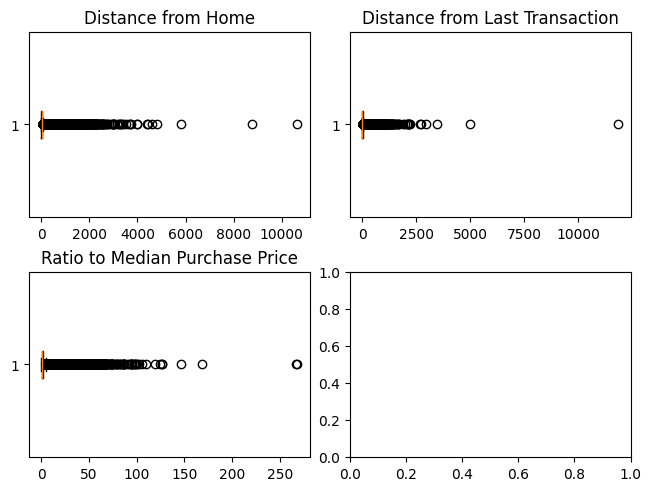

In [ ]:
df_stats = df.describe()
#Exclude specific columns before plotting boxplots
df_stats.drop(columns=['Repeat Retailer', 'Used Chips', 'Used Pin Number', 'Online Order', 'Fraud'], inplace=True)

# Plot Boxplots
plt.figure(figsize=(50,50))

# Create subplots based on the number of columns in df_stats
fig, ax = plt.subplots((len(df_stats.columns) // 2 + 1), 2, layout='constrained')

# Iterate over columns in df_stats for boxplot visualization
for i, col in enumerate(df_stats.columns):

    # Create a boxplot for each column in the specified subplot
    ax[i//2, i%2].boxplot(df[col], vert=False)

    # Set title for the subplot based on the column name
    ax[i//2, i%2].set_title(col)

Remove Non-sensible Values

In [ ]:
#display DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999988 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Distance from Home              999988 non-null  float64
 1   Distance from Last Transaction  999988 non-null  float64
 2   Ratio to Median Purchase Price  999988 non-null  float64
 3   Repeat Retailer                 999988 non-null  float64
 4   Used Chips                      999988 non-null  float64
 5   Used Pin Number                 999988 non-null  float64
 6   Online Order                    999988 non-null  float64
 7   Fraud                           999988 non-null  float64
dtypes: float64(8)
memory usage: 68.7 MB


In [ ]:
for col in df_stats.columns:

    #Get 25th percentile for current column
    Q1 = df_stats.loc['25%', col]

    #Get the 75th percentile for current column
    Q3 = df_stats.loc['75%', col]

    #Calculate Interquartile Range
    IQR = Q3 - Q1

    #Filter the rows in the DataFrame (values in col fall within the range 1.5 times IQR below Q1 and 1.5 times IQR above Q3.)
    df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

#display the dataframe
df

,Distance from Home,Distance from Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chips,Used Pin Number,Online Order,Fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


The code above calculates the Interquartile Range (IQR) for each column and filtering all the rows based on a defined range (1.5 times IQR below Q1 and 1.5 times IQR above Q3). This code will effectively identifies and eliminates outliers from the dataset.

After this step, all the outliers from the dataset have been successfully removed.

### Clean Inconsistent Data

In [ ]:
#count number of unique values in each column
df.nunique()

Distance from Home                718701
Distance from Last Transaction    718619
Ratio to Median Purchase Price    718565
Repeat Retailer                        2
Used Chips                             2
Used Pin Number                        2
Online Order                           2
Fraud                                  2
dtype: int64

By using df.nunique(), we find out that there is no inconsistent data. The column 'Distance from Home', 'Distance from Last Transaction' and 'Ratio to Median Purchase Price each having 715000+ unique values, showing a rich diversity of data. Categorical features such as "Repeat Retailer," "Used Chips," "Used Pin Number," "Online Order," and "Fraud" exhibit consistency as each of them having two distinct values.

## Data Imbalance

In [ ]:
# Create a pie chart using plotly
# The 'values' parameter is set to the count of each class in the 'fraud' column of the DataFrame
# The 'names' parameter is set to the labels list
# The 'width' and 'height' parameters set the size of the chart
# The 'color_discrete_sequence' parameter sets the colors of the pie slices
# The 'title' parameter sets the title of the chart
import plotly.express as px

# Define the labels for the pie chart
labels=["Genuine","Fraud"]

# Count the number of each class in the "Class" column of the DataFrame, and convert the counts to a list
fraud_or_not = df['Fraud'].value_counts().tolist()
# Create a list of the counts of genuine and fraudulent transactions
values = [fraud_or_not[0], fraud_or_not[1]]
print(values);

print("Genuine:", values[0]);
print("Fraud:", values[1]);

fig = px.pie(values= df['Fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
# Display the pie chart
fig.show()

[709708, 9042]
Genuine: 709708
Fraud: 9042


The resulting pie chart displayed visually represents the imbalance between genuine and fraudulent transactions.

We will need to fix the data imbalance problem above with **resampling**.

In this case, we will be using a combination of Synthetic Data Oversampling and Synthetic Data Undersampling technique called [Synthetic Minority Oversampling Technique (SMOTE)](https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/#h-smote-synthetic-minority-oversampling-technique) and [Edited Nearest Neighbour (ENN)](https://bobrupakroy.medium.com/edited-nearest-neighbors-enn-c446a15e4bbe), whose combination is known as the [SMOTEENN algorithm](https://towardsdatascience.com/imbalanced-classification-in-python-smote-enn-method-db5db06b8d50) which can be accessed from the `imblearn` library.

###SMOTE-ENN

In [ ]:
#Create a copy of the original DataFrame
X = df.copy()

#Separate the 'Fraud' from features and store in y.
y = X.pop('Fraud')

In [ ]:
from imblearn.combine import SMOTEENN

# Create an instance of SMOTEENN with a specified random state
# Apply SMOTEENN resampling to both features (X) and the target variable (y)
X, y = SMOTEENN(random_state=161223).fit_resample(X, y)

In [ ]:
# Define the labels for the pie chart
labels=["Genuine","Fraud"]

# Count the number of each class in the "Class" column of the DataFrame, and convert the counts to a list
fraud_or_not = y.value_counts().tolist()
# Create a list of the counts of genuine and fraudulent transactions
values = [fraud_or_not[0], fraud_or_not[1]]
print(values);

print("Genuine:", values[0]);
print("Fraud:", values[1]);

fig = px.pie(values= y.value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
# Display the pie chart
fig.show()

[709525, 706994]
Genuine: 709525
Fraud: 706994


Here, we can see that we have quite balanced data points for both genuine and fraudulent transactions after applying the SMOTE-ENN resampling technique.

## Exploratory Data Analysis

After we have completed general data cleaning steps, we can proceed to explore our data and analyse it further.

### Fraud Correlation
Since we are aiming to predict instances of fraud, we can examine the correlation between various variables and the occurrence of fraud by using a correlation heatmap.


### Data Integration

Drop Derivable Data

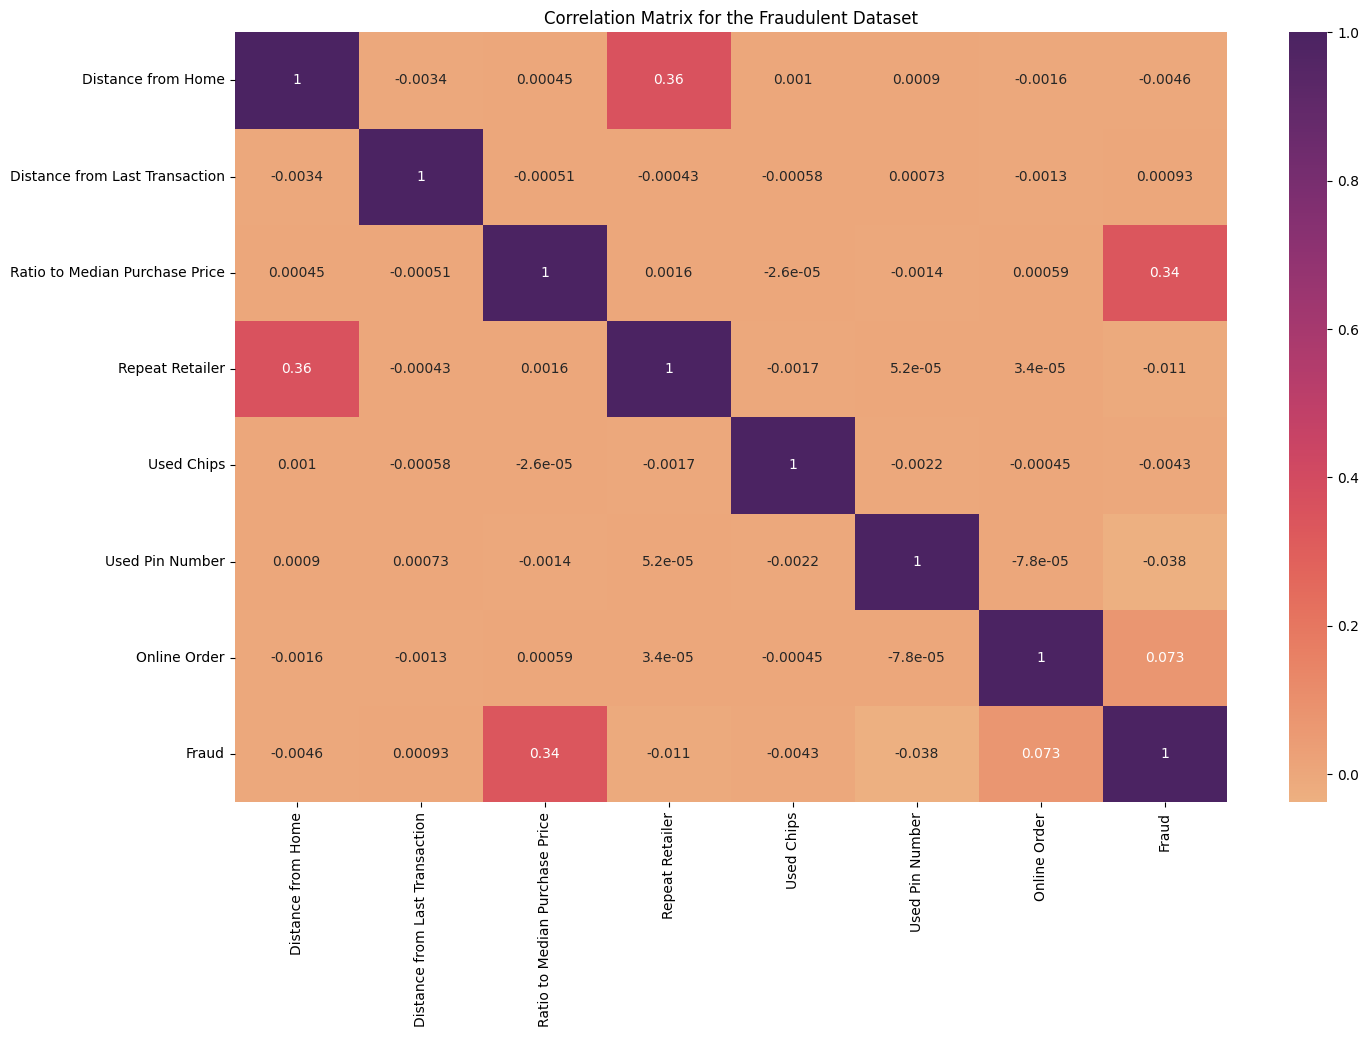

In [ ]:
#Size of heatmap figure
plt.figure(figsize=(16,10))

#Create correlation matrix using df.corr and generate a heatmap using sns.heatmap
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette('flare', as_cmap=True))

#Set the title
plt.title('Correlation Matrix for the Fraudulent Dataset')

#show the plot
plt.show()

By examining the last row, we can observe how different columns correlate with 'Fraud'.

Here are some side notes explaining the meaning of correlation values:
* Correlation values closer to 0 indicate a weak correlation between the two columns.
* Correlation values closer to -1 or 1 indicate a strong correlation between the two columns.

We can see that 'Fraud' is not strongly correlated with any columns, but it is slightly positively correlated with:

* `Ratio to Median Purchase Price`: 0.33

There are no two or more features that are highly correlated (correlation coefficient close to 1 or -1) with the 'Fraud' column. Hence, there is no immediate need to drop any features from the dataset based on high correlation.

### Data Transformation

Normalisation

* histograms are being plotted to visualize the distribution of the selected columns before normalization

array([[<Axes: title={'center': 'Distance from Home'}>,
        <Axes: title={'center': 'Distance from Last Transaction'}>],
       [<Axes: title={'center': 'Ratio to Median Purchase Price'}>,
        <Axes: >]], dtype=object)

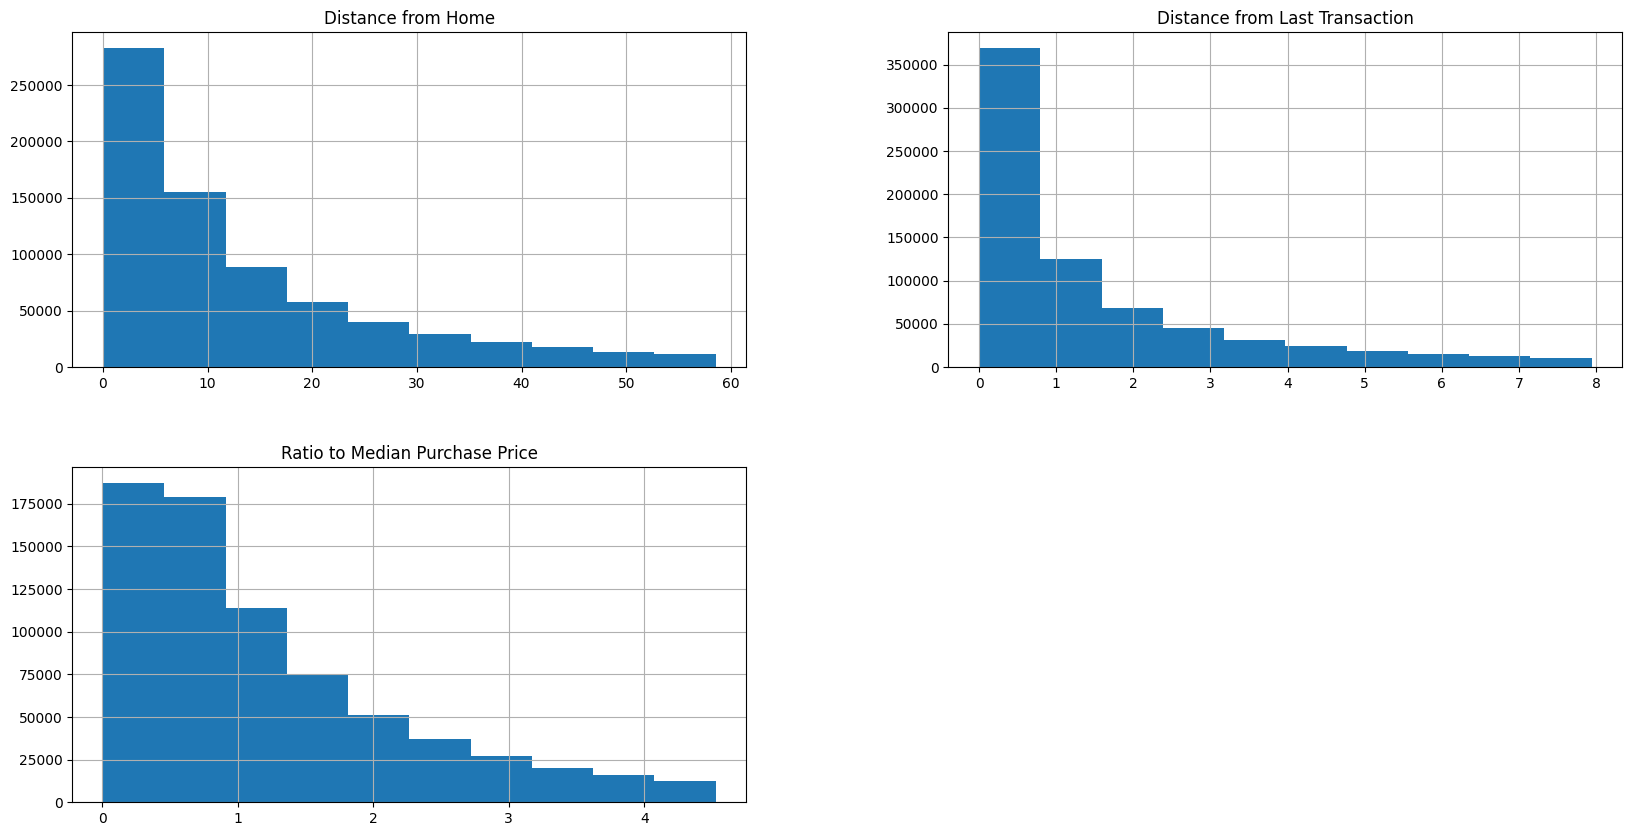

In [ ]:
#Create a copy of the original DataFrame
df_histogram = df.copy()

#Drop the 5 columns that have two distinct values
df_histogram.drop(columns=['Repeat Retailer', 'Used Chips', 'Used Pin Number', 'Online Order', 'Fraud'], inplace=True)

#Plot histograms for all remaining columns('Distance from Home','Distance from Last Transaction','Ratio to Median Purchase Price')
df_histogram.hist(figsize=(20,10))

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


In [ ]:
from sklearn import preprocessing

#A MinMaxScaler is created with the specified feature range (0-1)
m = preprocessing.MinMaxScaler(feature_range = (0,1))

#Create a copy of the DataFrame for normalization
df_normminmax = df_histogram.copy()

#Perform Min-Max scaling on selected 3 columns
df_normminmax[['Distance from Home','Distance from Last Transaction','Ratio to Median Purchase Price']] = m.fit_transform(df_normminmax[['Distance from Home','Distance from Last Transaction','Ratio to Median Purchase Price']])

#display the first 5 rows of the normalized DataFrame
df_normminmax.head()

,Distance from Home,Distance from Last Transaction,Ratio to Median Purchase Price
0,0.988642,0.039152,0.429272
1,0.184924,0.022089,0.285177
2,0.086887,0.101339,0.093594
3,0.038312,0.704928,0.079211
4,0.754829,0.071295,0.490478


array([[<Axes: title={'center': 'Distance from Home'}>,
        <Axes: title={'center': 'Distance from Last Transaction'}>],
       [<Axes: title={'center': 'Ratio to Median Purchase Price'}>,
        <Axes: >]], dtype=object)

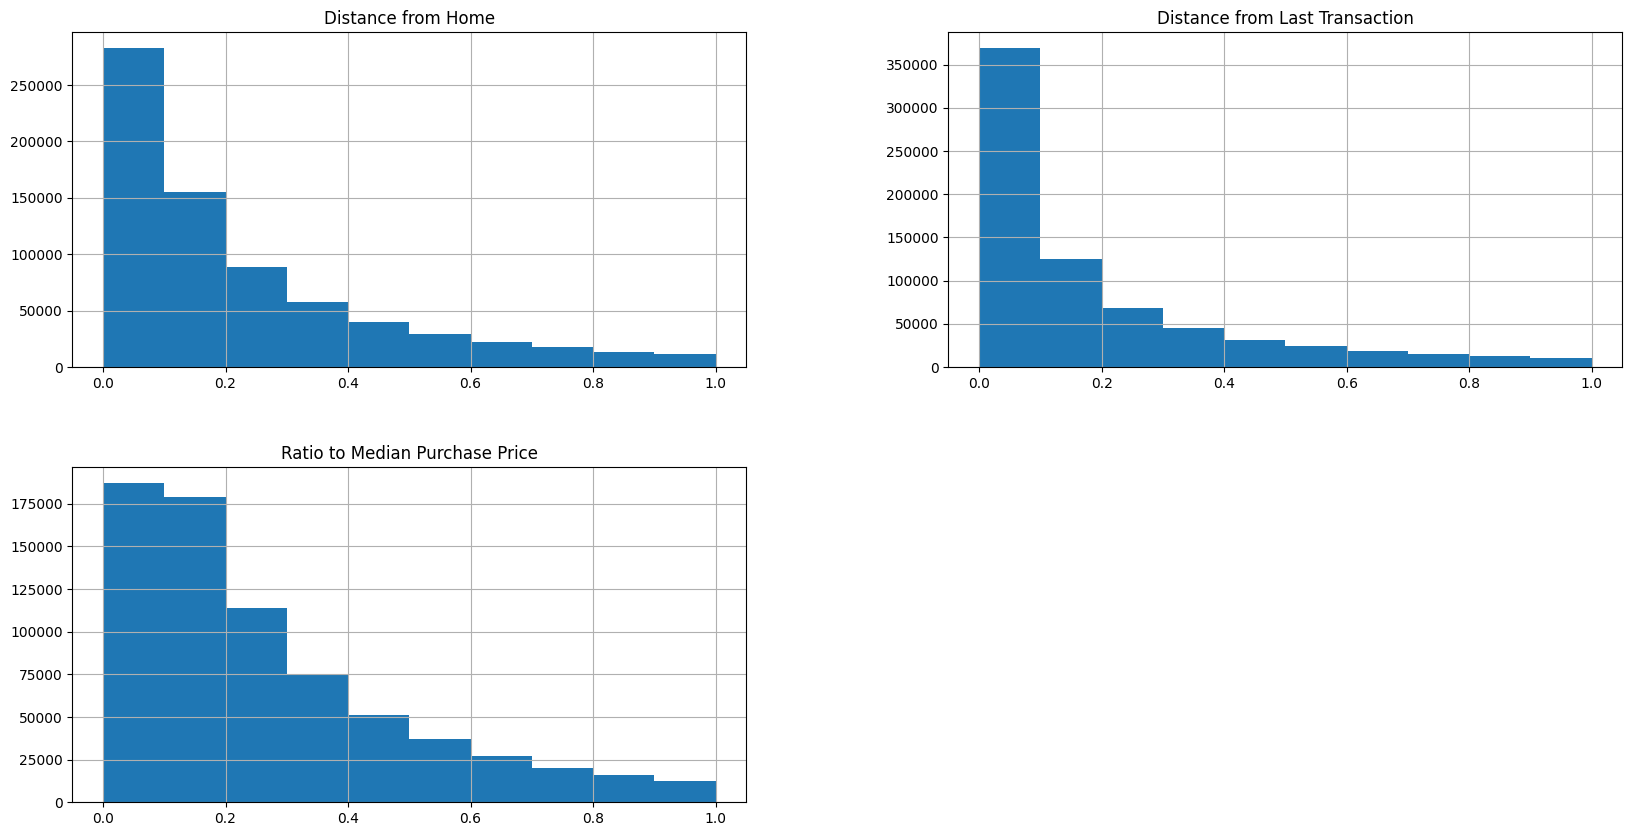

In [ ]:
#Plot histograms for all columns in the normalized DataFrame
df_normminmax.hist(figsize=(20,10))

Using the MinMaxScaler from scikit-learn, it helps to normalize the three specific columns 'Distance from Home', 'Distance from Last Transaction', 'Ratio to Median Purchase Price' in the DataFrame. It transforms these columns to a range between 0 and 1, allowing for fair comparisons. The histograms above visualize how the distributions of these columns change after normalization

### Data Reduction

Aggregation

There is no need to do any data aggregation as we are not visualising anything for any answers.

## Export Cleaned Data

In [ ]:
#Concatenate the normalized DataFrame (df_normminmax) with the remaining columns from the original DataFrame
df_cleaned = pd.concat([df_normminmax, df[['Repeat Retailer', 'Used Chips', 'Used Pin Number', 'Online Order', 'Fraud']]], axis=1)

In [ ]:
#Show the first 5 rows of the cleaned DataFrame
df_cleaned.head()

,Distance from Home,Distance from Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chips,Used Pin Number,Online Order,Fraud
0,0.988642,0.039152,0.429272,1.0,1.0,0.0,0.0,0.0
1,0.184924,0.022089,0.285177,1.0,0.0,0.0,0.0,0.0
2,0.086887,0.101339,0.093594,1.0,0.0,0.0,1.0,0.0
3,0.038312,0.704928,0.079211,1.0,1.0,0.0,1.0,0.0
4,0.754829,0.071295,0.490478,1.0,1.0,0.0,1.0,0.0


In [ ]:
# export the df_cleaned to 'balanced_cleaned_credit_card_data.csv'

df_cleaned.to_csv('balanced_cleaned_credit_card_data.csv', index=False)


*A cleaned dataset is successfully exported and ready for model selection.

# Model Selection
Once your data is ready, you will need to choose an appropriate machine learning algorithm for your project. You may choose from supervised or unsupervised learning, and select the model based on the problem you are trying to solve.

## Splitting Train and Test Data

Like every Machine Learning training steps, we will start with a train-test split on our data.

In [ ]:
from sklearn.model_selection import train_test_split

# Read the preprocessed and cleaned dataset
X = pd.read_csv('balanced_cleaned_credit_card_data.csv', index_col=0)
#Extract the target variable ('Fraud') and set it as variable 'y'
y = X.pop('Fraud')

#Split dataset into training and testing sets
#75% data used for training, 25% used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We have split our dataset into training and testing sets, where the Train Data takes a random 80% of the dataset and the Test Data consists of the remaining 20% of the dataset. Our model will perform training on the Train Data and perform model evaluation on the Test Data to determine the better model.

## Determining Best Model

There is a lot of different classification models to test and see which model performs the best on our data. We have decided to use the Accuracy and Root Mean Squared Error (RMSE) to measure our model performance.

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error

Now we will train our data against multiple classification models to test which gives us the best performance.

Some common classification models are as below:

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Naive Bayes
- XGBoost

Below is the code to train our data against different classification models to help us find out which classification models perform best based on the 'Accuracy' and 'Root-mean-square deviation(RMSE)' calculated.

In [ ]:
# Import all the necessary libraries for machine learning classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

# Create a list of classification models
classification_model_class = [LogisticRegression,
                              DecisionTreeClassifier,
                              RandomForestClassifier,
                              GaussianNB,
                              XGBClassifier]

# Model performance is created to store the results calculated
model_performance = {
    'ModelName': ['LogisticRegression',
                  'DecisionTreeClassifier',
                  'RandomForestClassifier',
                  'GaussianNB',
                  'XGBClassifier'],
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1_Score': [],
    'RMSE': [],
}

# Loop through each model class
for ModelClass in classification_model_class:
    # Create model with specified arguments
    args = {'random_state': 161223} if ModelClass != GaussianNB else {}
    model = ModelClass(**args)

    # Train data on model
    model.fit(X_train, y_train)

    # Model prediction using the trained model
    y_pred = model.predict(X_test)

    # Evaluation scoring
    model_performance['Model'].append(model)
    model_performance['Accuracy'].append(accuracy_score(y_test, y_pred))
    model_performance['Precision'].append(precision_score(y_test, y_pred))
    model_performance['Recall'].append(recall_score(y_test, y_pred))
    model_performance['F1_Score'].append(f1_score(y_test, y_pred))
    model_performance['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Create DataFrame from the model performance dictionary
model_performance_df = pd.DataFrame(model_performance)

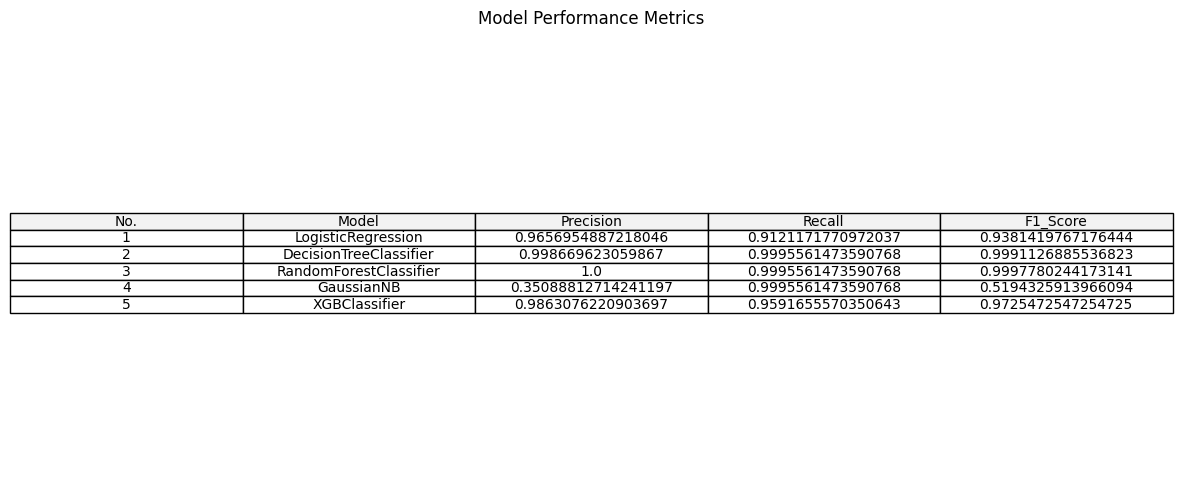

In [ ]:
import matplotlib.pyplot as plt

# Add 'No.' column to the DataFrame
model_performance_df['No.'] = range(1, len(model_performance_df) + 1)

# Set 'Model' column with the provided list
model_performance_df['Model'] = ['LogisticRegression',
                                'DecisionTreeClassifier',
                                'RandomForestClassifier',
                                'GaussianNB',
                                'XGBClassifier']

# Select the columns you want in the table
table_columns = ['No.', 'Model', 'Precision', 'Recall', 'F1_Score']

# Display the table in a matplotlib table
fig, ax = plt.subplots(figsize=(15, 6))
ax.axis('off')  # Hide axes

# Create the table
table_data = model_performance_df[table_columns].values
table = ax.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center', colColours=["#f2f2f2"] * len(table_columns))
table.auto_set_font_size(False)
table.set_fontsize(10)

# Add a title
plt.title('Model Performance Metrics')

# Show the table
plt.show()

Based on the table, we can see that Decision Tree Classifier has the highest F1 Score among all the model

We can visualize the model performance using bar charts. Model performs best if their:

- Accuracy value is highest
- RMSE value is lowest

The code provided below is determine which model performs the best based on the 'Accuracy' value and RMSE value. After performing the code above, the DataFrame now contains the model names, the actual model instances, accuracy scores, and RMSE values for each model. This makes it easier to analyze and visualize the model performance into charts as provided in the code below.

Text(0.5, 1.0, 'RMSE')

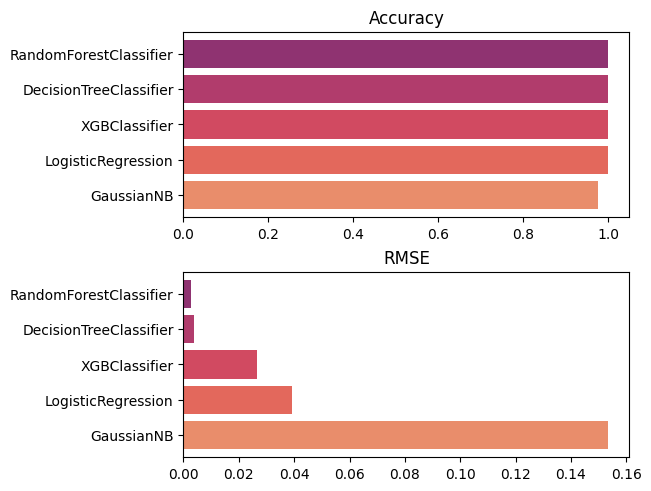

In [ ]:
# Visualize model performance by creating two subplots ax1 and ax2
fig, (ax1, ax2) = plt.subplots(2, layout='constrained')

#Arrange the models from lowest to highest accuracy for better visualization.
model_performance_df.sort_values(by='Accuracy', inplace=True)
#Horizontal bar chart is created on the first subplot (ax1). ( y-axis: 'ModelName', x-axis : 'Accuracy')
ax1.barh(model_performance_df['ModelName'], model_performance_df['Accuracy'], color=sns.color_palette('flare'))
#Set title of subplot ax1
ax1.set_title('Accuracy')

#Arrange the models from highest to lowest RMSE for better visualization.
model_performance_df.sort_values(by='RMSE', ascending=False, inplace=True)
#Horizontal bar chart is created on the second subplot (ax2). ( y-axis: 'ModelName', x-axis : 'RMSE')
ax2.barh(model_performance_df['ModelName'], model_performance_df['RMSE'], color=sns.color_palette('flare'))
#Set title of subplot ax2
ax2.set_title('RMSE')

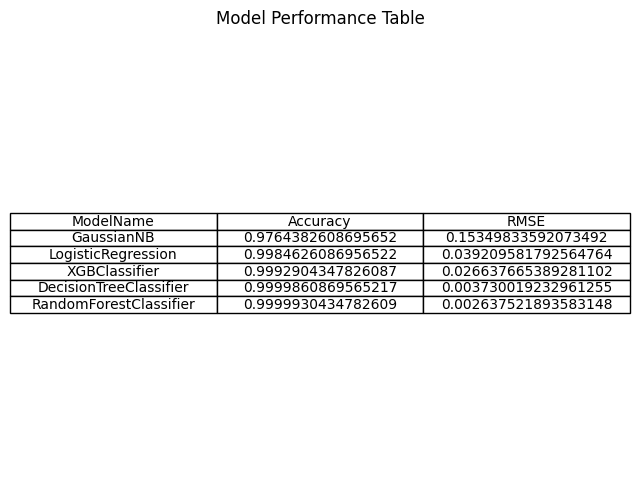

In [ ]:
import matplotlib.pyplot as plt

# Arrange the models from lowest to highest accuracy for better visualization.
model_performance_df.sort_values(by='Accuracy', inplace=True)

# Create a figure and axis for the table
fig, ax = plt.subplots(figsize=(8, 6))

# Display the table in ascending order of Accuracy
table_data = model_performance_df[['ModelName', 'Accuracy', 'RMSE']]
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)

# Remove axes for better visualization
ax.axis('off')

plt.title('Model Performance Table')
plt.show()


## Selected Model

Since the accuracy for RandomForestClassifier and DecisionTressClassifier is the highest and their RMSE value is the lowest, RandomForestClassifier and DecisionTreeClassifier are among our best performing model.
We will choose DecisionTreeClassifier for our model.

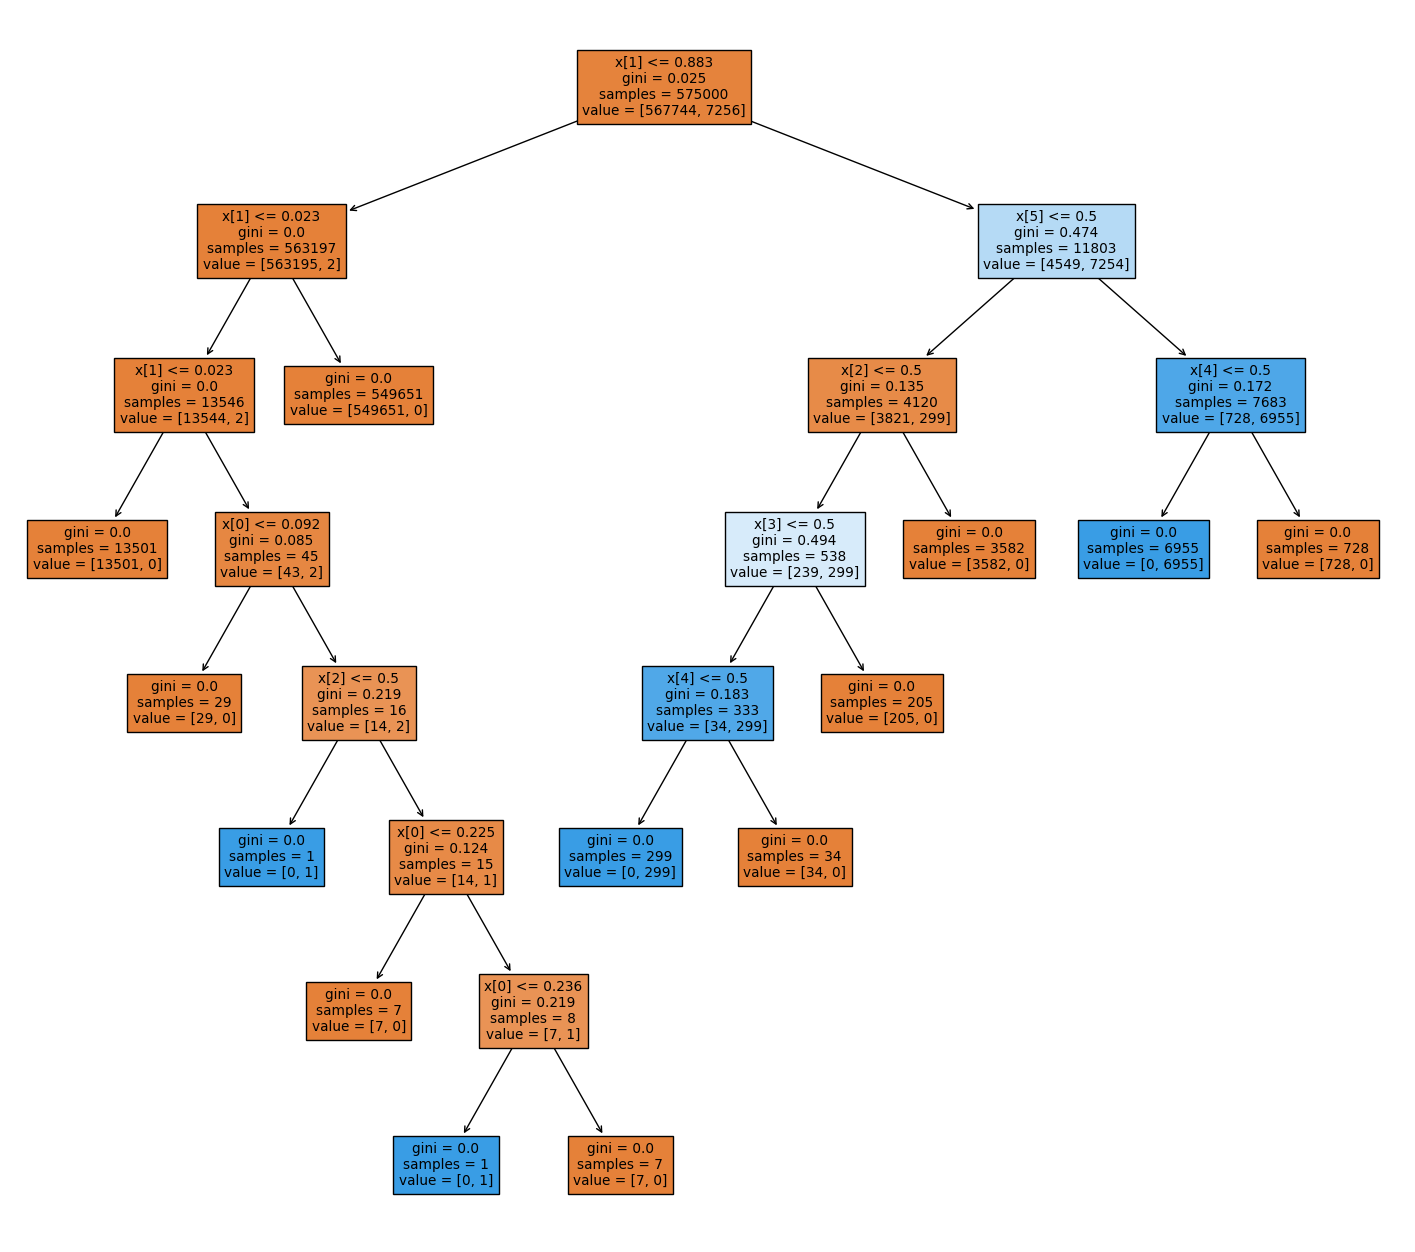

In [ ]:
import sklearn.tree

# Train the model
model = sklearn.tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

# Visualize the model
fig = plt.figure(figsize=(18,16))
# Use the plot_tree function to visualize the decision tree
sklearn.tree.plot_tree(model, filled=True)

# Display the visualization
plt.show()

# Model Training and Evaluation
Once the model is selected, it needs to be trained on the preprocessed data, and its performance should be evaluated using appropriate metrics. The model can be fine-tuned to improve its performance through Hyperparameter Tuning.





## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': range(1, 10),
}

#Create an instance of GridSearchCV with DecisionTreeClassifier, searching over the specified parameter grid
#Using 4-fold cross-validation and accuracy as the scoring metric
clf = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='accuracy', cv=4)

# Fit the GridSearchCV instance on the training data to find the best hyperparameters
clf.fit(X_train, y_train)

# Display the best hyperparameters and corresponding best accuracy score
clf.best_params_, clf.best_score_

({'max_depth': 5}, 0.9999860869565218)

The first hyperparameter values found were {'max_depth': 5} with a corresponding best accuracy score of approximately 0.999986.

In [ ]:
params = {
    'max_depth': [5],
    'min_samples_split': range(2, 11),
    'min_samples_leaf': [i for i in range(1, 10)],
    'ccp_alpha': [i/10.0 for i in range(0, 10)]
}

#Create an instance of GridSearchCV with DecisionTreeClassifier, searching over the specified parameter grid
#Using 4-fold cross-validation and accuracy as the scoring metric
clf = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='accuracy', cv=4)
# Fit the GridSearchCV instance on the training data to find the best hyperparameters
clf.fit(X_train, y_train)

# Display the best hyperparameters and corresponding best accuracy score
clf.best_params_, clf.best_score_

({'ccp_alpha': 0.0,
  'max_depth': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 7},
 0.9999913043478261)

We can extend the GridSearch to include additional hyperparameters: 'max_depth','min_samples_split', 'min_samples_leaf', and 'ccp_alpha'.

The best hyperparameter values found in this case were {'ccp_alpha': 0.0, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 7} with a corresponding best accuracy score of approximately 0.999991.

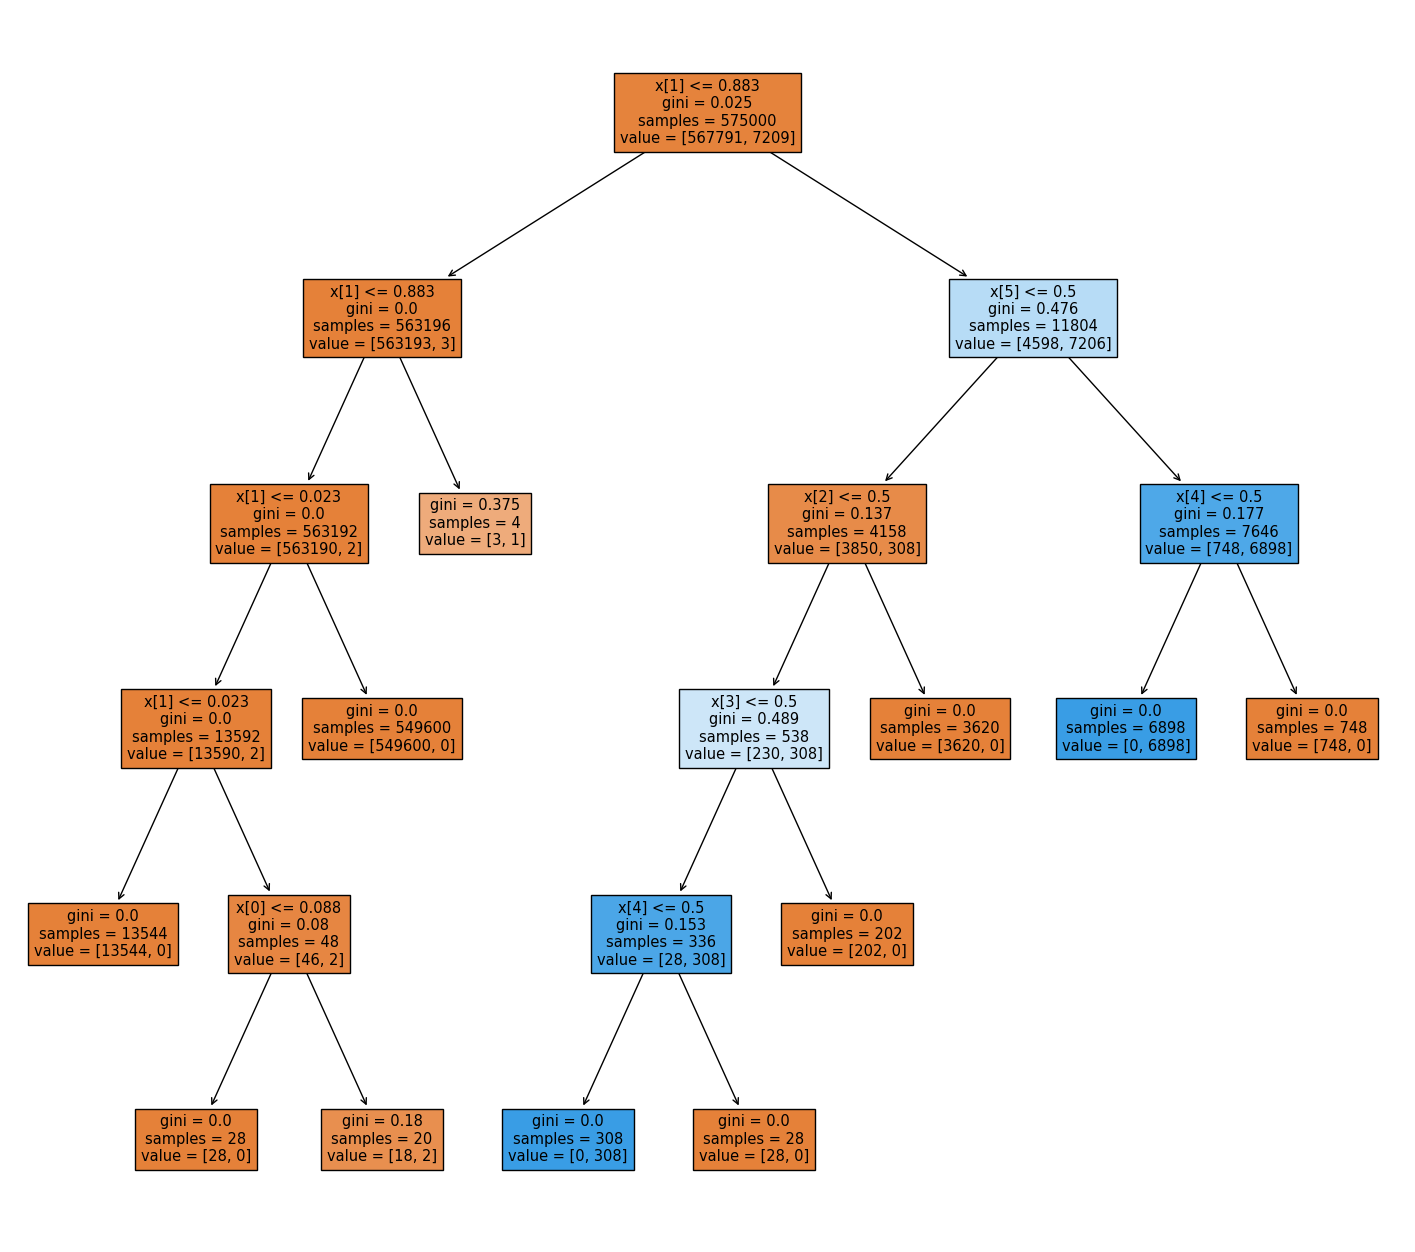

In [ ]:
# Train the model
# model = sklearn.tree.DecisionTreeClassifier(**clf.best_params_)
model = sklearn.tree.DecisionTreeClassifier(ccp_alpha=0.0, max_depth=5, min_samples_leaf=1, min_samples_split=7)
model.fit(X_train, y_train)

# Visualize the model
fig = plt.figure(figsize=(18,16))
sklearn.tree.plot_tree(model, filled=True)
plt.show()

In [ ]:
model.score(X_test, y_test)

0.9999930434782609

The best hyperparameters found during the tuning process are utilized for training the decision tree model as shown above.

## Experimenting

Make a df copy and try a different normalisation technique to observe the change in accuracy

In [ ]:
df_normStandardScaler = df.copy()

In this case, we choose standard scaler as another method to normalise the data as our previous normalised data is using min max scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler
scaler = StandardScaler()

# Create a copy of the DataFrame for standardization
df_normstandard = df.copy()

# Perform standardization on selected 3 columns
df_normstandard[['Distance from Home', 'Distance from Last Transaction', 'Ratio to Median Purchase Price']] = scaler.fit_transform(df_normstandard[['Distance from Home', 'Distance from Last Transaction', 'Ratio to Median Purchase Price']])

# Display the first 5 rows of the standardized DataFrame
df_normstandard.head()

,Distance from Home,Distance from Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chips,Used Pin Number,Online Order,Fraud
0,3.388308,-0.668432,0.720828,1.0,1.0,0.0,0.0,0.0
1,-0.180709,-0.745214,0.078245,1.0,0.0,0.0,0.0,0.0
2,-0.616054,-0.388598,-0.776109,1.0,0.0,0.0,1.0,0.0
3,-0.831761,2.327482,-0.840249,1.0,1.0,0.0,1.0,0.0
4,2.350029,-0.523791,0.993774,1.0,1.0,0.0,1.0,0.0


In [ ]:
X_exp = df_normstandard
y_exp = X_exp.pop('Fraud')

In [ ]:
from sklearn.model_selection import train_test_split
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_exp, test_size=0.2)

In [ ]:
model_exp = sklearn.tree.DecisionTreeClassifier(ccp_alpha=0.0, max_depth=5, min_samples_leaf=1, min_samples_split=7)
model_exp.fit(X_train_exp, y_train_exp)

DecisionTreeClassifier(max_depth=5, min_samples_split=7)

In [ ]:
model_exp.score(X_test_exp, y_test_exp)

1.0

In [ ]:
# a table to compare the accuracy value of model.score and model_exp.score

model_score = model.score(X_test, y_test)
model_exp_score = model_exp.score(X_test_exp, y_test_exp)

table = pd.DataFrame({'Model': ['Decision Tree (Min Max Scaler)', 'Decision Tree (Standard Scaler)'],
                     'Accuracy': [model_score, model_exp_score]})

table


,Model,Accuracy
0,Decision Tree (Min Max Scaler),0.999993
1,Decision Tree (Standard Scaler),1.000000


Baased on the experimental trial of using Standard Scaler as our scaling method, the accuracy seem to improve to 100% from 99.9993%

## Pipelining

Since our data is preprocessed before entering into our ML model, we can create a pipeline. This allow us to generalize a dataset input from data preprocess to the ML model prediction and receive a output.

In [ ]:
from sklearn.pipeline import Pipeline

# Create Pipeline
pipeline = Pipeline(steps=[
    ('model', DecisionTreeClassifier(random_state=161223, **clf.best_params_)),
])

In [ ]:
pipeline

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_split=7,
                                        random_state=161223))])

## Export Pipeline

Now we can export our pipeline for deployment using `joblib` library.

In [ ]:
import joblib
# Fit the machine learning pipeline to the training data
pipeline.fit(X_train, y_train)

# Save the trained pipeline to a file using joblib named 'pipeline.pkl' and compression is applied
joblib.dump(pipeline, 'pipeline.pkl', compress=True)

['pipeline.pkl']

## Load Pipeline

We can load our pipeline and predict it with our new test data to see if it works as expected.

In [ ]:
# Load the pre-trained machine learning pipeline
pipeline_loaded = joblib.load('pipeline.pkl')

# Calculate the accuracy score of the model
pipeline_loaded.score(X_test, y_test)

0.9999930434782609

As what we expect, our pipeline is able to preprocess the data correctly and give us a fairly accurate result.

# Final Deliverable
Finally, you will need to present your findings and results in a clear and concise manner. Document it using Google Colab/Kaggle/Jupyter Notebook. You only
submit the link to your notebook. Please make grant access for me to view and assess your work.

## Evaluation

The accuracy of the model is 0.9999930434782609. This shows that the accuracy of the trained model is impressively high, achieving a score of approximately 99.9993%.This high accuracy suggests that the model performs exceptionally well.

## Reference
[https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset)
[https://www.kaggle.com/code/marcinrutecki/how-to-create-a-meaningful-eda](https://www.kaggle.com/code/marcinrutecki/how-to-create-a-meaningful-eda)